# Load datasets from kaggle

In [1]:
!pip install -q kaggle

In [6]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = '/content/'

In [8]:
!chmod 600 /content/kaggle.json

In [9]:
! kaggle datasets download -d mlg-ulb/creditcardfraud

Dataset URL: https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud
License(s): DbCL-1.0
creditcardfraud.zip: Skipping, found more recently modified local copy (use --force to force download)


In [10]:
!unzip /content/creditcardfraud.zip

Archive:  /content/creditcardfraud.zip
  inflating: creditcard.csv          


# Data preparation

In [102]:
import pandas as pd

In [103]:
df = pd.read_csv('creditcard.csv')

In [104]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [105]:
print(df.shape)
print(df.columns)

(284807, 31)
Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')


In [106]:
class_0_data = df[df['Class'] == 0]
class_1_data = df[df['Class'] == 1]

In [107]:
df.drop(['Class','Time'],axis=1, inplace=True)

In [108]:
df.shape

(284807, 29)

# PCA/SVD

In [109]:
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99


In [110]:
from sklearn.decomposition import PCA
import numpy as np

In [111]:
pca = PCA(n_components=2)
pca.fit(df)

PCA(n_components=2)

In [112]:
print(pca.explained_variance_)
print(pca.explained_variance_ratio_)

[6.25618850e+04 3.74536946e+00]
[9.99538016e-01 5.98389764e-05]


In [113]:
# because shape of data is not square metrix
# so pca will use SVD instead directly elgendecompostion
# then we can see singular value of pca
print(pca.singular_values_)

[133484.08223699   1032.81348445]


In [114]:
# variance = singularvalue**2 / N-1
print(pca.singular_values_**2 / (df.shape[0] - 1))

[6.25618850e+04 3.74536946e+00]


In [115]:
pca.components_

array([[-1.78322294e-03, -3.50839517e-03, -1.27837144e-03,
         5.58889315e-04, -2.13201563e-03,  1.15041177e-03,
         1.96506336e-03, -4.92204583e-04, -1.94340470e-04,
        -4.41859173e-04,  4.24307536e-07, -3.81173631e-05,
         2.10628711e-05,  1.29349023e-04, -1.09263994e-05,
        -1.36959278e-05,  2.48186427e-05,  1.19463813e-04,
        -1.82742240e-04,  1.04608011e-03,  3.11274610e-04,
        -1.88006789e-04, -2.81192640e-04,  1.24607097e-05,
        -9.96934250e-05, -6.18479087e-06,  4.65153221e-05,
         1.35371917e-05,  9.99985487e-01],
       [ 9.80433374e-01, -1.72567606e-01, -4.42815127e-02,
         1.60858256e-02, -5.80420947e-02,  2.92504999e-02,
         4.44477841e-02, -1.06342606e-02, -3.83575233e-03,
        -8.64819658e-03,  7.86315145e-06, -6.95207483e-04,
         3.83065148e-04,  2.29279454e-03, -1.88275355e-04,
        -2.30451122e-04,  4.11191015e-04,  1.96700563e-03,
        -2.96998210e-03,  1.66325238e-02,  4.86462522e-03,
        -2.92

In [116]:
print(np.linalg.norm(pca.components_[0],2))
print(np.linalg.norm(pca.components_[1],2))

0.9999999999999997
1.0000000000000002


In [117]:
np.argsort(pca.components_, axis=1)
# You will see that first compoenent of pca will have highest variance at index 28
# because data at index 28 is Amount and each value have high value so it have high variance
# it make varaince of pca mostly comfrom Amount feature

array([[ 1,  4,  0,  2,  7,  9, 22,  8, 21, 18, 24, 11, 15, 14, 25, 10,
        23, 27, 12, 16, 26, 17, 13, 20,  3, 19,  5,  6, 28],
       [ 1,  4,  2,  7,  9, 22,  8, 18, 21, 24, 11, 15, 14, 25, 10, 23,
        27, 12, 16, 26, 28, 17, 13, 20,  3, 19,  5,  6,  0]])

In [118]:
from sklearn.preprocessing import StandardScaler

In [119]:
# try to normalize Amount feature
scaler = StandardScaler()
norm_amount = scaler.fit_transform(df['Amount'].values.reshape(-1,1))
df_norm = df.copy()
df_norm['Amount'] = norm_amount

In [120]:
df_norm.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403


In [121]:
pca_full = PCA()

In [122]:
pca_full.fit(df_norm)

PCA()

In [123]:
print(pca_full.explained_variance_)
print(pca_full.explained_variance_ratio_)
# You can see that most variance ratio is only 0.12 but previous pca is 0.99

[3.94021436 3.15078871 2.34418639 2.07228289 1.99344796 1.79774344
 1.61407212 1.42997233 1.20846085 1.19113354 1.04185509 0.99846948
 0.99059119 0.91984171 0.83781226 0.76784072 0.72153154 0.70743618
 0.68602576 0.65692585 0.54293918 0.52770241 0.39647737 0.36681957
 0.27311217 0.23254945 0.16356272 0.10906126 0.04899505]
[0.12417222 0.0992942  0.07387487 0.06530608 0.06282167 0.05665422
 0.05086599 0.04506426 0.03808353 0.03753747 0.0328331  0.03146584
 0.03121757 0.02898796 0.02640288 0.02419779 0.0227384  0.0222942
 0.02161947 0.02070241 0.01711023 0.01663005 0.01249462 0.01155998
 0.00860688 0.00732858 0.00515453 0.00343697 0.00154403]


In [124]:
[pca_full.explained_variance_ratio_[:i].sum() for i in range(1,len(pca_full.explained_variance_ratio_)+1)]
# You can use any threshold depend on you decission

[np.float64(0.12417221700240548),
 np.float64(0.2234664136837865),
 np.float64(0.297341283087364),
 np.float64(0.36264736465276437),
 np.float64(0.4254690363969983),
 np.float64(0.4821232609431215),
 np.float64(0.5329892533251948),
 np.float64(0.578053510715455),
 np.float64(0.6161370383567828),
 np.float64(0.6536745119737088),
 np.float64(0.6865076131461225),
 np.float64(0.7179734567799169),
 np.float64(0.7491910233892555),
 np.float64(0.7781789855294428),
 np.float64(0.8045818652967325),
 np.float64(0.8287796566454422),
 np.float64(0.8515180569787018),
 np.float64(0.8738122549839409),
 np.float64(0.8954317233369076),
 np.float64(0.9161341349576937),
 np.float64(0.9332443618057616),
 np.float64(0.9498744159820196),
 np.float64(0.9623690341821324),
 np.float64(0.9739290143622842),
 np.float64(0.9825358922680544),
 np.float64(0.9898644733321833),
 np.float64(0.9950190012897949),
 np.float64(0.9984559663142906),
 np.float64(1.0000000000000002)]

In [125]:
from numpy.linalg import svd

In [126]:
u, s, v = svd(df_norm, full_matrices=False)

In [127]:
print(s)
print(pca_full.singular_values_)
# You can see that every varaince are the same
# so pca really use Singularvalue decomposition instead Elgendecompostion

[1059.33785446  947.29273665  817.09139555  768.24384113  753.48917721
  715.54742607  678.00989958  638.1729375   586.66591818  582.4448292
  544.72615266  533.26362939  531.15564033  511.83633949  488.4812779
  467.6383698   453.31723203  448.8675407   442.02290968  432.54644174
  393.23318223  387.67616986  336.03442353  323.22192974  278.89780432
  257.35476996  215.83244167  176.24216957  118.12740391]
[1059.33785446  947.29273665  817.09139555  768.24384113  753.48917721
  715.54742607  678.00989958  638.1729375   586.66591818  582.4448292
  544.72615266  533.26362939  531.15564033  511.83633949  488.4812779
  467.6383698   453.31723203  448.8675407   442.02290968  432.54644174
  393.23318223  387.67616986  336.03442353  323.22192974  278.89780432
  257.35476996  215.83244167  176.24216957  118.12740391]


In [128]:
print(s**2 / (df_norm.shape[0]-1))
print(pca_full.explained_variance_)

[3.94021436 3.15078871 2.34418639 2.07228289 1.99344796 1.79774344
 1.61407212 1.42997233 1.20846085 1.19113354 1.04185509 0.99846948
 0.99059119 0.91984171 0.83781226 0.76784072 0.72153154 0.70743618
 0.68602576 0.65692585 0.54293918 0.52770241 0.39647737 0.36681957
 0.27311217 0.23254945 0.16356272 0.10906126 0.04899505]
[3.94021436 3.15078871 2.34418639 2.07228289 1.99344796 1.79774344
 1.61407212 1.42997233 1.20846085 1.19113354 1.04185509 0.99846948
 0.99059119 0.91984171 0.83781226 0.76784072 0.72153154 0.70743618
 0.68602576 0.65692585 0.54293918 0.52770241 0.39647737 0.36681957
 0.27311217 0.23254945 0.16356272 0.10906126 0.04899505]


# Plot

In [129]:
import matplotlib.pyplot as plt

In [130]:
# plot with pca has the most variance two feature
X_pca = pca.fit_transform(df)

In [131]:
print(X_pca)

[[ 61.27138246  -1.3193663 ]
 [-85.66182602   1.0437773 ]
 [290.31669587  -0.81081688]
 ...
 [-20.47073936   1.9707341 ]
 [-78.35063834  -0.40813962]
 [128.6521883   -0.35865375]]


In [132]:
class_0 = class_0_data.index
class_1 = class_1_data.index

In [133]:
X_pca_0 = np.take(X_pca, class_0, axis=0)
X_pca_1 = np.take(X_pca, class_1, axis=0)

In [134]:
X_pca_0

array([[ 61.27138246,  -1.3193663 ],
       [-85.66182602,   1.0437773 ],
       [290.31669587,  -0.81081688],
       ...,
       [-20.47073936,   1.9707341 ],
       [-78.35063834,  -0.40813962],
       [128.6521883 ,  -0.35865375]])

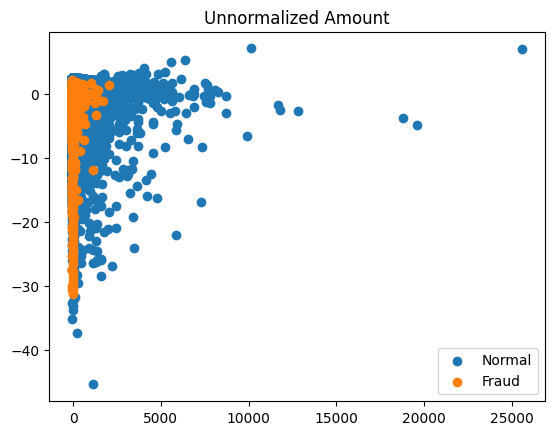

In [135]:
plt.scatter(X_pca_0[:,0], X_pca_0[:,1], marker='o', label='Normal')
plt.scatter(X_pca_1[:,0], X_pca_1[:,1], marker='o', label='Fraud')
plt.title("Unnormalized Amount")
plt.legend()
# You can split't normal and Fraud with this sample

In [136]:
X_norm_pca = pca.fit_transform(df_norm)

In [137]:
X_norm_pca_0 = np.take(X_norm_pca, class_0, axis=0)
X_norm_pca_1 = np.take(X_norm_pca, class_1, axis=0)

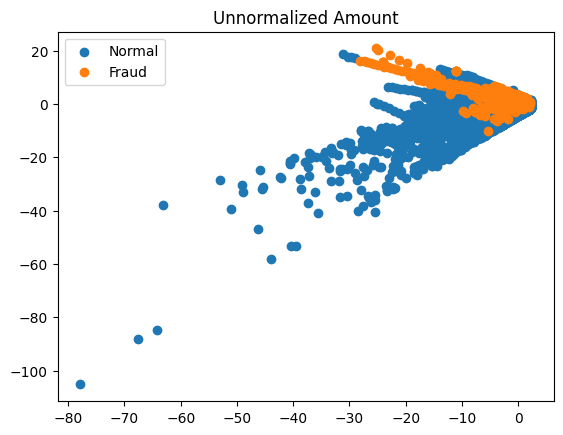

In [138]:
plt.scatter(X_norm_pca_0[:,0], X_norm_pca_0[:,1], marker='o', label='Normal')
plt.scatter(X_norm_pca_1[:,0], X_norm_pca_1[:,1], marker='o', label='Fraud')
plt.title("Unnormalized Amount")
plt.legend()
# You stil can't split normal and Fraud with this sample
# because samples still overlap

# T-sne

In [170]:
from sklearn.manifold import TSNE

In [183]:
tsne = TSNE(n_components=2, verbose=1, n_jobs=-1, random_state=1)

In [197]:
df_1 = class_1_data.copy()
df_0 = class_0_data.sample(df_1.shape[0])
small_df = pd.concat([df_0,df_1], axis=0, ignore_index=True)

In [209]:
small_x = small_df.drop(['Class','Time'], axis=1)

In [210]:
X_tsne = tsne.fit_transform(small_x)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 984 samples in 0.010s...
[t-SNE] Computed neighbors for 984 samples in 0.038s...
[t-SNE] Computed conditional probabilities for sample 984 / 984
[t-SNE] Mean sigma: 3.798040
[t-SNE] KL divergence after 250 iterations with early exaggeration: 53.048965
[t-SNE] KL divergence after 1000 iterations: 0.391190


In [211]:
len(X_tsne)

984

In [212]:
small_class_0 = small_df[small_df['Class'] == 0].index
small_class_1 = small_df[small_df['Class'] == 1].index
print(small_class_1)
print(small_class_0)

Index([492, 493, 494, 495, 496, 497, 498, 499, 500, 501,
       ...
       974, 975, 976, 977, 978, 979, 980, 981, 982, 983],
      dtype='int64', length=492)
Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
       ...
       482, 483, 484, 485, 486, 487, 488, 489, 490, 491],
      dtype='int64', length=492)


In [213]:
X_tsne_0 = np.take(X_tsne, small_class_0, axis=0)
X_tsne_1 = np.take(X_tsne, small_class_1, axis=0)

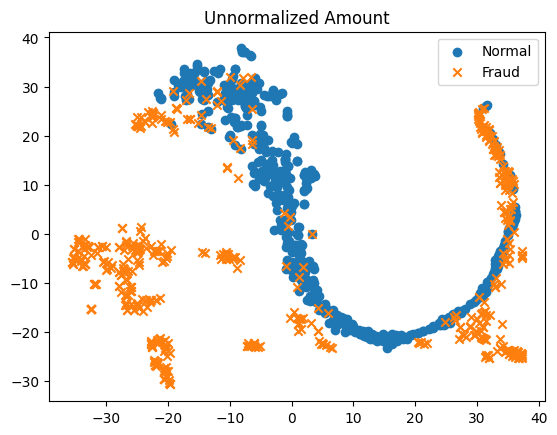

In [214]:
plt.scatter(X_tsne_0[:,0], X_tsne_0[:,1], marker='o', label='Normal')
plt.scatter(X_tsne_1[:,0], X_tsne_1[:,1], marker='x', label='Fraud')
plt.title("Unnormalized Amount")
plt.legend()
# You stil can't split normal and Fraud with this sample
# because samples still overlap

# Compare With PCA

In [216]:
X_pca = pca.fit_transform(small_x)

In [217]:
X_pca_0 = np.take(X_pca, small_class_0, axis=0)
X_pca_1 = np.take(X_pca, small_class_1, axis=0)

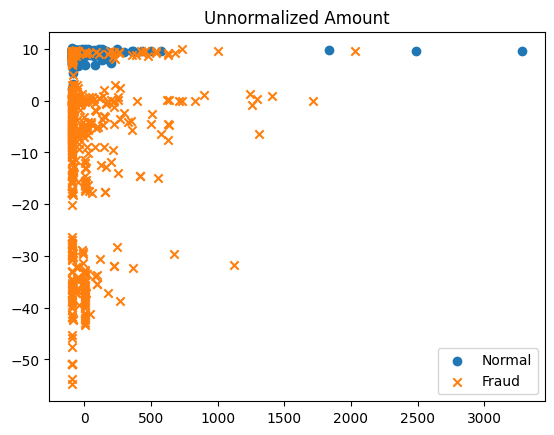

In [218]:
plt.scatter(X_pca_0[:,0], X_pca_0[:,1], marker='o', label='Normal')
plt.scatter(X_pca_1[:,0], X_pca_1[:,1], marker='x', label='Fraud')
plt.title("Unnormalized Amount")
plt.legend()
# You stil can't split normal and Fraud with this sample
# because samples still overlap

In [219]:
pca.explained_variance_

array([58359.86666659,   216.80194866])

In [220]:
pca.explained_variance_ratio_

array([0.99460066, 0.00369486])

In [222]:
pca.components_

array([[-1.00279485e-03, -3.34733515e-03, -7.31710674e-04,
         4.49823842e-04, -1.98976960e-03,  8.80744444e-04,
         2.33685284e-03,  5.46109899e-04,  8.86379552e-05,
        -4.31939563e-04,  6.44420774e-05, -1.24156539e-04,
        -3.25180705e-06,  8.96626086e-05,  5.84658686e-05,
        -5.30401524e-04, -1.08152405e-03, -3.24086475e-04,
         4.27778945e-04,  1.00402424e-03,  3.69383228e-04,
        -2.85194602e-04, -8.40824008e-04,  1.58523328e-05,
        -4.17661345e-04, -1.37856863e-04,  2.37520196e-04,
        -7.44916710e-05,  9.99986202e-01],
       [ 3.22850098e-01, -2.09538581e-01,  3.95757922e-01,
        -1.80261621e-01,  2.45411090e-01,  5.40588629e-02,
         3.65935354e-01, -4.93416199e-02,  1.33932213e-01,
         2.89771581e-01, -1.53844941e-01,  2.77087783e-01,
        -6.58105223e-03,  2.42816574e-01,  8.82467917e-03,
         2.10851166e-01,  3.68100106e-01,  1.40042648e-01,
        -3.90844811e-02, -2.41230951e-02, -4.78790840e-03,
        -8.66